<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/NEIL1_XGBOOST_WITH_TREESHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2   

In [2]:
#helper utilities for model training and interpretation 
import sys 
sys.path.append('../xgboost_with_shap/')

from helpers import * 
import numpy as np

from plotnine import * 
import pandas as pd 


In [9]:
data=pd.read_csv("../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',')

In [10]:
data.head()

,rna_id,editing_value,minimum_free_energy,ensemble_free_energy,mfe_frequency,ensemble_diversity,sim_nor_score,probability_active_conf,num_mutations,mut_exist,...,d3_length_stem,d3_length_hairpin,d3_length_bulge,d3_length_internal_es,d3_length_internal_ecs,d3_5prm_cp_hairpin,d3_5prm_cp_bulge,d3_3prm_cp_bulge,d3_5prm_cp_internal,d3_3prm_cp_internal
0,TTYH_BC_000,0.3060,-86.5,-87.05,0.406642,2.91,1.0000,0.399850,0,0,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TTYH_BC_001,0.2755,-79.9,-80.48,0.388526,3.04,0.9011,0.190174,1,1,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TTYH_BC_002,0.3245,-79.6,-80.17,0.398008,3.02,0.9037,0.193371,1,1,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TTYH_BC_003,0.3885,-79.9,-80.78,0.241542,3.57,0.9866,0.115347,1,1,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TTYH_BC_004,0.2045,-85.8,-86.11,0.608203,2.66,0.9054,0.298253,1,1,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#remove any null editing level values 
data=data[~data["editing_value"].isnull().values]

In [12]:
data['editing_value']=(data['editing_value']-0.33)/np.std(data['editing_value']-0.33)

In [13]:
data=format_for_xgboost(data)

../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[pd.isna(feature)]="NA"
../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[pd.isna(feature)]="NA"
../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[pd.isna(feature)]="NA"
../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a co

(601, 553)


../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[pd.isna(feature)]="NA"
../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[pd.isna(feature)]="NA"
../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[pd.isna(feature)]="NA"
../xgboost_with_shap/helpers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a co

In [14]:
data.head()

,rna_id:TTYH_BC_000,rna_id:TTYH_BC_001,rna_id:TTYH_BC_002,rna_id:TTYH_BC_003,rna_id:TTYH_BC_004,rna_id:TTYH_BC_005,rna_id:TTYH_BC_006,rna_id:TTYH_BC_007,rna_id:TTYH_BC_008,rna_id:TTYH_BC_009,...,d3_length_stem,d3_length_hairpin,d3_length_bulge,d3_length_internal_es,d3_length_internal_ecs,d3_5prm_cp_hairpin,d3_5prm_cp_bulge:G:C,d3_3prm_cp_bulge:G:C,d3_5prm_cp_internal,d3_3prm_cp_internal
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,20.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [15]:
feat_to_plot=open("ttyh2_top_feat.txt",'r').read().strip().split('\n')

In [16]:
data=data[['editing_value']+feat_to_plot]

In [17]:
high_levels=data[data['editing_value']>=1]
low_levels=data[data['editing_value']<= -2]
remaining_levels=data[(data['editing_value']>-2) & (data['editing_value']<1)]

In [18]:
high_levels.shape

(8, 21)

In [19]:
m_high_levels=pd.melt(high_levels)
m_high_levels['Group']='High'
m_low_levels=pd.melt(low_levels)
m_low_levels['Group']='Low'
m_remaining=pd.melt(remaining_levels)
m_remaining['Group']="Other"
all_df=pd.concat((m_high_levels,m_low_levels,m_remaining),axis=0)

/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 88 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


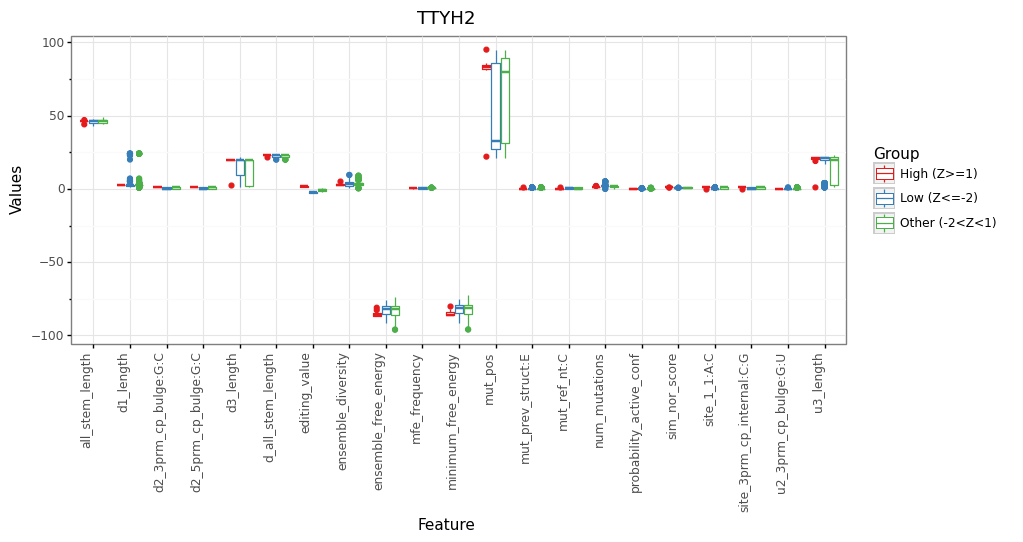

<ggplot: (8783563728361)>


/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: TTYH2.editing.outlier.features.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 88 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


In [22]:
import plotnine
plotnine.options.figure_size = (10, 4)

p=(ggplot(all_df, aes('variable', 'value',color='Group'))
 + geom_boxplot()
 + ggtitle("TTYH2")
 + xlab("Feature")
 + ylab("Values")
 + scale_color_manual(values=['#e41a1c','#377eb8','#4daf4a'],labels=["High (Z>=1)","Low (Z<=-2)","Other (-2<Z<1)"])
 + theme_bw()
 + theme(axis_text_x=element_text(rotation=90, hjust=1)))
print(p)
ggsave(plot=p, filename='TTYH2.editing.outlier.features.svg',width=10,height=3.5,units='in')


/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: TTYH2.editing.outlier.features.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 88 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
